In [18]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Get the current working directory (where your notebook is)
base_dir = os.path.dirname(os.getcwd())

# Load the datasets from the 'data/raw' folder
linear_file_path = os.path.join(base_dir, 'data', 'raw', 'linear_data_raw.csv')
logistic_file_path = os.path.join(base_dir, 'data', 'raw', 'logistic_data_raw.csv')

linear_df = pd.read_csv(linear_file_path)
logistic_df = pd.read_csv(logistic_file_path)

print("Linear Data:")
print(linear_df.head())
print("\nLogistic Data:")
print(logistic_df.head())

Linear Data:
   Time_of_Day  Temperature_Celsius
0          8.0                26.96
1          8.2                27.18
2          8.4                26.45
3          8.6                27.27
4          8.8                28.23

Logistic Data:
   Hours_Studied  Exam_Result
0            1.6            0
1            5.6            1
2            9.3            1
3            5.1            1
4            7.5            1


# Linear Regression

In [19]:
# Prepare the data
X_lin = linear_df[['Time_of_Day']]
y_lin = linear_df['Temperature_Celsius']

# Train the model
model_lin = LinearRegression()
model_lin.fit(X_lin, y_lin)

# Make predictions for plotting the line
y_lin_pred = model_lin.predict(X_lin)

print(f"Linear Regression Equation: y = {model_lin.intercept_:.2f} + {model_lin.coef_[0]:.2f}x")

Linear Regression Equation: y = 7.64 + 2.23x


## Visualize the results

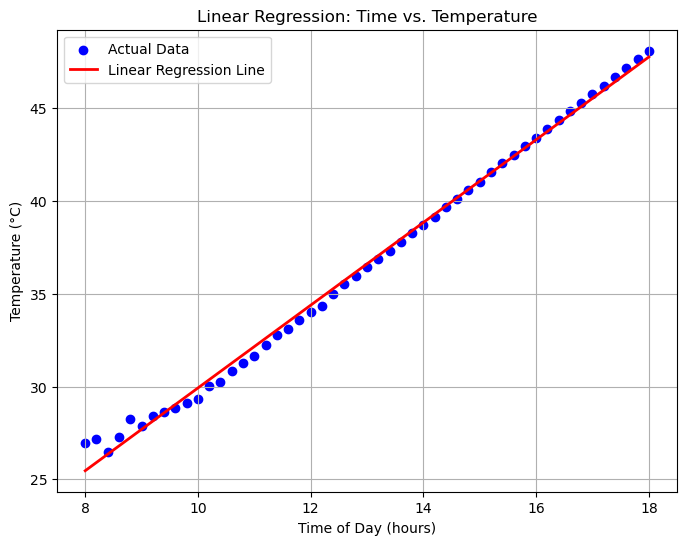

Linear Regression Equation: y = 7.64 + 2.23x


In [20]:
# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_lin, y_lin, color='blue', label='Actual Data')
plt.plot(X_lin, y_lin_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Linear Regression: Time vs. Temperature')
plt.xlabel('Time of Day (hours)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Linear Regression Equation: y = {model_lin.intercept_:.2f} + {model_lin.coef_[0]:.2f}x")

# Logistic Regression

c:\Users\LLOYD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


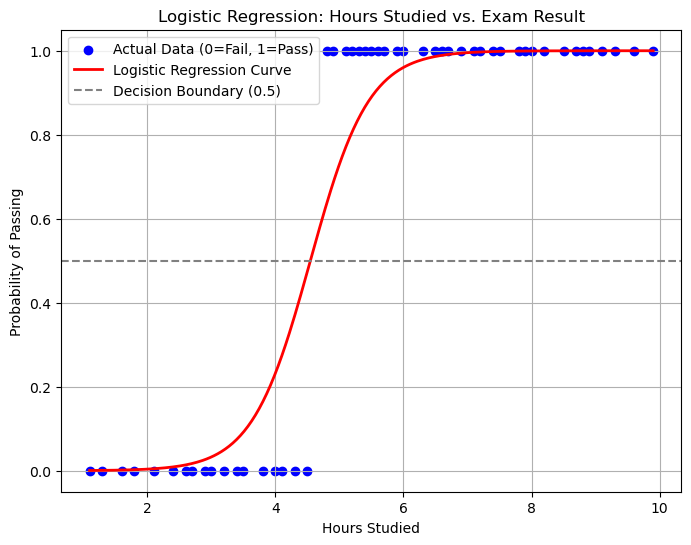

A student who studies for 6 hours has a probability of passing of: 0.96
Classification for 6 hours: 1


c:\Users\LLOYD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\LLOYD\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
# Prepare the data
X_log = logistic_df[['Hours_Studied']]
y_log = logistic_df['Exam_Result']

# Train the model
model_log = LogisticRegression()
model_log.fit(X_log, y_log)

# Plotting the S-shaped curve
plt.figure(figsize=(8, 6))
plt.scatter(X_log, y_log, color='blue', label='Actual Data (0=Fail, 1=Pass)')

# Generate a smooth curve for the prediction line
X_test = np.linspace(X_log.min(), X_log.max(), 300).reshape(-1, 1)
prob_pred = model_log.predict_proba(X_test)[:, 1]

plt.plot(X_test, prob_pred, color='red', linewidth=2, label='Logistic Regression Curve')
plt.axhline(y=0.5, color='gray', linestyle='--', label='Decision Boundary (0.5)')
plt.title('Logistic Regression: Hours Studied vs. Exam Result')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.legend()
plt.grid(True)
plt.show()

# Get a final prediction
print(f"A student who studies for 6 hours has a probability of passing of: {model_log.predict_proba([[6]])[0][1]:.2f}")
print(f"Classification for 6 hours: {model_log.predict([[6]])[0]}")